In [1]:
# IMPORT PYTHON LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print (tf.__version__)

2.8.2


In [3]:
# INSTALL KERAS-RESNET PACKAGE (FROM MY REPO, CONV1D FIXED)
!python -m pip install --upgrade --no-deps --force-reinstall git+https://github.com/tackoo/keras-resnet.git@original_regularization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tackoo/keras-resnet.git (to revision original_regularization) to /tmp/pip-req-build-irh4vald
  Running command git clone -q https://github.com/tackoo/keras-resnet.git /tmp/pip-req-build-irh4vald
  Running command git checkout -b original_regularization --track origin/original_regularization
  Switched to a new branch 'original_regularization'
  Branch 'original_regularization' set up to track remote branch 'original_regularization' from 'origin'.
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=22758 sha256=c74eab5e8574cad9b53c713f52f151c9f862aeff464946dcd1bb05256c49ff82
  Stored in directory: /tmp/pip-ephem-wheel-cache-4zcdvoe3/wheels/d5/bf/e3/75b95199f84d9ee753d3e6bf9ae5f37c7aa097c32f4bd676ac
Successfully built keras-resnet


In [2]:
# MOUNT GOOGLE DRIVE
# Follow instructions as prompted after running code
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Run this cell to load shuffled & temperature compensated data
examples = np.load('/content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Training_Tests/train4_Dec14/allExamples/examples_comp_std_prep_shuf.npy')
state = np.load('/content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Training_Tests/train4_Dec14/allExamples/state_std_prep_shuf.npy')
stall = np.load('/content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Training_Tests/train4_Dec14/allExamples/stall_std_prep_shuf.npy')

# examples_2 = np.concatenate((examples[:,:,0:6], examples[:,:,7:9]), axis=2)
trainingX = examples
trainingState = state
trainingStall = stall

In [35]:
# Option 2 (1D Resnet):
# This works well with the following:
import pickle
import keras_resnet.models as krm
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam

# convert data to categorical
encoder = preprocessing.LabelEncoder()

state_categorical = encoder.fit_transform(trainingState)
stall_categorical = encoder.fit_transform(trainingStall)
trainingY = state_categorical ###Change this based on the output of interest###

#Prepare ResNet model
class_cnt = max(trainingY) + 1
model = krm.ResNet1D18(classes=class_cnt)

#Compiling the CNN
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Define model, compile, and fit
savepath = '/content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/'
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=savepath+"new_training_July2022_9sensors.tf", verbose=0, save_best_only=True)
history = model.fit (trainingX, trainingY, batch_size=256, epochs = 75, verbose = 1, shuffle=False, validation_split=0.1, callbacks = [checkpointer])
with open(savepath+"new_training_July2022_8sensors.p", "wb") as file_pi:
  pickle.dump(history.history, file_pi)

Epoch 1/75
707/707 [==============================] - ETA: 0s - loss: 0.9899 - accuracy: 0.6232

INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


707/707 [==============================] - 53s 53ms/step - loss: 0.9899 - accuracy: 0.6232 - val_loss: 3.5105 - val_accuracy: 0.5080
Epoch 2/75
707/707 [==============================] - ETA: 0s - loss: 0.5877 - accuracy: 0.7646

INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


707/707 [==============================] - 36s 52ms/step - loss: 0.5877 - accuracy: 0.7646 - val_loss: 0.7126 - val_accuracy: 0.7633
Epoch 3/75
707/707 [==============================] - ETA: 0s - loss: 0.4719 - accuracy: 0.8104

INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


707/707 [==============================] - 36s 51ms/step - loss: 0.4719 - accuracy: 0.8104 - val_loss: 0.6042 - val_accuracy: 0.7844
Epoch 4/75
707/707 [==============================] - ETA: 0s - loss: 0.4028 - accuracy: 0.8373

INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


707/707 [==============================] - 37s 52ms/step - loss: 0.4028 - accuracy: 0.8373 - val_loss: 0.3603 - val_accuracy: 0.8615
Epoch 5/75
707/707 [==============================] - ETA: 0s - loss: 0.3467 - accuracy: 0.8599

INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


707/707 [==============================] - 36s 51ms/step - loss: 0.3467 - accuracy: 0.8599 - val_loss: 0.3030 - val_accuracy: 0.8915
Epoch 6/75
707/707 [==============================] - 29s 41ms/step - loss: 0.3184 - accuracy: 0.8717 - val_loss: 0.4472 - val_accuracy: 0.8753
Epoch 7/75
707/707 [==============================] - 29s 41ms/step - loss: 0.2871 - accuracy: 0.8844 - val_loss: 0.3664 - val_accuracy: 0.8852
Epoch 8/75
707/707 [==============================] - 29s 41ms/step - loss: 0.2642 - accuracy: 0.8938 - val_loss: 0.5624 - val_accuracy: 0.8563
Epoch 9/75
707/707 [==============================] - 29s 41ms/step - loss: 0.2388 - accuracy: 0.9049 - val_loss: 0.3959 - val_accuracy: 0.8893
Epoch 10/75
706/707 [============================>.] - ETA: 0s - loss: 0.2169 - accuracy: 0.9132

INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


707/707 [==============================] - 36s 51ms/step - loss: 0.2169 - accuracy: 0.9132 - val_loss: 0.2133 - val_accuracy: 0.9129
Epoch 11/75
706/707 [============================>.] - ETA: 0s - loss: 0.2157 - accuracy: 0.9143

INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/new_training_July2022_8sensors.tf/assets


707/707 [==============================] - 37s 52ms/step - loss: 0.2157 - accuracy: 0.9143 - val_loss: 0.2014 - val_accuracy: 0.9196
Epoch 12/75
707/707 [==============================] - 29s 41ms/step - loss: 0.1928 - accuracy: 0.9230 - val_loss: 0.2070 - val_accuracy: 0.9180
Epoch 13/75
707/707 [==============================] - 29s 41ms/step - loss: 0.1903 - accuracy: 0.9243 - val_loss: 0.2095 - val_accuracy: 0.9195
Epoch 14/75
707/707 [==============================] - 29s 41ms/step - loss: 0.1676 - accuracy: 0.9332 - val_loss: 0.2098 - val_accuracy: 0.9223
Epoch 15/75
707/707 [==============================] - 29s 42ms/step - loss: 0.1689 - accuracy: 0.9336 - val_loss: 0.2396 - val_accuracy: 0.9102
Epoch 16/75
707/707 [==============================] - 29s 41ms/step - loss: 0.1475 - accuracy: 0.9414 - val_loss: 0.2241 - val_accuracy: 0.9206
Epoch 17/75
707/707 [==============================] - 29s 41ms/step - loss: 0.1443 - accuracy: 0.9432 - val_loss: 0.2505 - val_accuracy: 0.91

In [36]:
# Export state encoder for decoding
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

state_categorical = encoder.fit_transform(trainingState)
with open(savepath+"resnet_encoder.p", "wb") as file_pi:
  pickle.dump(encoder, file_pi)
with open(savepath+"statetruth.p", "wb") as file_pi:
  pickle.dump(state_categorical, file_pi)

Model: "ResNet1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 padding_conv1 (ZeroPadding1  multiple                 0         
 D)                                                              
                                                                 
 conv1 (Conv1D)              multiple                  4032      
                                                                 
 bn_conv1 (ResNetBatchNormal  multiple                 256       
 ization)                                                        
                                                                 
 conv1_relu (Activation)     multiple                  0         
                                                                 
 pool1 (MaxPooling1D)        multiple                  0         
                                                                 
 pool5 (GlobalAveragePooling  multiple                 0  

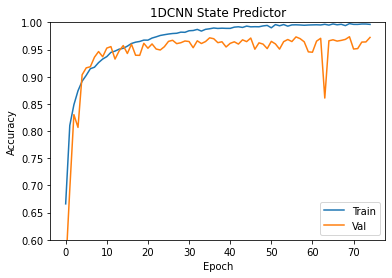

In [ ]:
#Viz the model & training history
import keras
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
import tensorflow.keras
import keras_resnet
import keras_resnet.models

leakyrelu = LeakyReLU(alpha=0.2)
resnet_model = keras_resnet.models.ResNet1D18(freeze_bn=True)
resnet_bn_layer = keras_resnet.layers.ResNetBatchNormalization(freeze=True)
folderpath = '/content/gdrive/Shared drives/WindTunnelTests-Feb2019/Sept2020_Tests/Kerasfiles_Dec2020/'
filename = 'new_training_July2022'

def visualizemodel():
  plot_model(classifier, to_file=folderpath+'Visualizations/'+filename+"_model.png", expand_nested=False)

def visualizetraining(history):
  fig = plt.figure()
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title ('1DCNN State Predictor')
  plt.ylabel ('Accuracy')
  plt.xlabel ('Epoch')
  plt.legend (['Train', 'Val'], loc='lower right')
  plt.ylim (0.6, 1.0)
  plt.show()
  fig.savefig(folderpath+'Visualizations/'+filename+'.png',dpi=300)

classifier = keras.models.load_model(folderpath+filename+".tf", custom_objects={'LeakyReLU': leakyrelu, 'ResNet1D18': resnet_model, 'BatchNormalization': resnet_bn_layer})
print (classifier.summary())
with open(folderpath+filename+'.p', 'rb') as file_pi:
  history = pickle.load(file_pi)

visualizetraining(history)